In [82]:
import pandas as pd
import yfinance as yf
from bs4 import BeautifulSoup
import requests
import re
from matplotlib import pyplot as plt

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [21]:
# First, we write a definition of how to get tickers so its reusable!

def getTicker(ticker):
    this_ticker = yf.Ticker(ticker)
    return this_ticker.history(period="max").head()

# then we can call it below

In [22]:
getTicker('TSLA')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [23]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url,'html.parser')
soup = BeautifulSoup(response.text)


In [24]:
# define table, headers, rows
table = soup.find('tbody')
df = pd.DataFrame()

for row in table.find_all('tr'):
    col = row.find_all("td")
    year = col[0].text
    revenue = col[1].text
    new_row = {year, revenue}
    # print(new_row)
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

print(df.tail)

<bound method NDFrame.tail of          0        1
0     2021  $53,823
1     2020  $31,536
2     2019  $24,578
3     2018  $21,461
4     2017  $11,759
5   $7,000     2016
6   $4,046     2015
7     2014   $3,198
8   $2,013     2013
9     2012     $413
10    $204     2011
11    $117     2010
12    $112     2009>


## Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [25]:
getTicker('GME')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [26]:
gme_data = requests.get('https://finance.yahoo.com/quote/GME/history')
gme_soup = BeautifulSoup(gme_data.text,'html.parser')

gme_table = soup.find('tbody')
gme_df = pd.DataFrame()

for row in gme_table.find_all('tr'):
    col = row.find_all("td")
    year2 = col[0].text
    revenue2 = col[1].text
    new_row = {year2, revenue2}
    # print(new_row)
    gme_df = pd.concat([gme_df, pd.DataFrame([new_row])], ignore_index=True)

print(gme_df)

         0        1
0     2021  $53,823
1     2020  $31,536
2     2019  $24,578
3     2018  $21,461
4     2017  $11,759
5   $7,000     2016
6   $4,046     2015
7     2014   $3,198
8   $2,013     2013
9     2012     $413
10    $204     2011
11    $117     2010
12    $112     2009


## Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [76]:
# Create revenue_data

tsla_data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm')
tsla_soup = BeautifulSoup(tsla_data.text,'html.parser')

year = []
revenue = []


table = tsla_soup.find('tbody')
for row in table.find_all('tr'):
    data = row.find_all('td')
    year.append(data[0].text)
    revenue.append(data[1].text)

data = {'Year': year,'Revenue':revenue}
revenue_data = pd.DataFrame(data,columns=['Date','Revenue'])

# print(revenue_data)

   Date  Revenue
0   NaN  $53,823
1   NaN  $31,536
2   NaN  $24,578
3   NaN  $21,461
4   NaN  $11,759
5   NaN   $7,000
6   NaN   $4,046
7   NaN   $3,198
8   NaN   $2,013
9   NaN     $413
10  NaN     $204
11  NaN     $117
12  NaN     $112


In [73]:
# Create stock_data

stock_data = yf.Ticker('TSLA').history(period="max")
stock_data = stock_data.reset_index()
stock_data1 = stock_data[['Date','Close']]
# print(stock_data1)


                          Date       Close
0    2010-06-29 00:00:00-04:00    1.592667
1    2010-06-30 00:00:00-04:00    1.588667
2    2010-07-01 00:00:00-04:00    1.464000
3    2010-07-02 00:00:00-04:00    1.280000
4    2010-07-06 00:00:00-04:00    1.074000
...                        ...         ...
3447 2024-03-11 00:00:00-04:00  177.770004
3448 2024-03-12 00:00:00-04:00  177.539993
3449 2024-03-13 00:00:00-04:00  169.479996
3450 2024-03-14 00:00:00-04:00  162.500000
3451 2024-03-15 00:00:00-04:00  163.570007

[3452 rows x 2 columns]


In [81]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

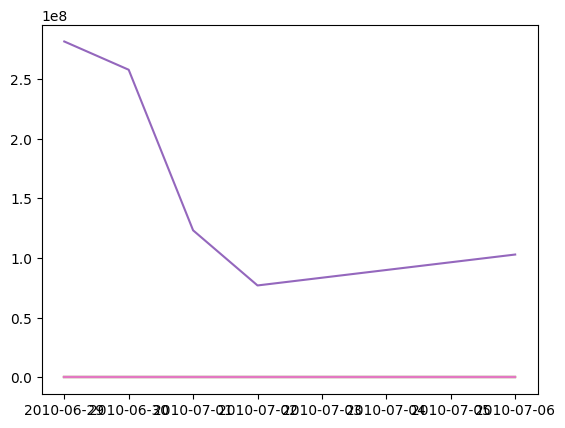

In [86]:
plt.plot(getTicker('TSLA'))